# Notebook for Lecture 18

Here, I demonstrate how to plot the spectrogram of a function.
We can start by applying this to 'pulse' signal and then think about applying it to some real data.

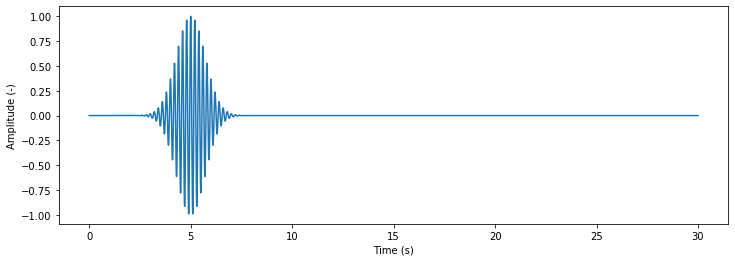

In [7]:
import numpy as np
import matplotlib.pyplot as plt
# Make a pulse with frequency f, centered at time tcenter and with a duration of d
def pulse(t,tcenter,f,d):
    return np.exp( -(t-tcenter)**2/d**2  ) * np.cos(2.*np.pi*f*t)


fs = 100.0 # sampling rate
dt = 1./fs # time spacing between samples
pulse_freq = 5. # frequency of pulse
pulse_tcenter = 5.0 # center time of pulse
pulse_duration = 1.0 # duration of pulse

# make time vector
t = np.arange(0.0,30.0+dt,dt)
x = pulse(t,pulse_tcenter,pulse_freq,pulse_duration)

plt.figure(figsize=(12,4))
plt.plot(t,x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (-)')
plt.show()


# Comments on the above

Note that the signal contains a pulse centered at 5 seeconds, and with a frequency of 5 Hz. We can calculate the spectrum of this signal, but by doing so, we'll lose information about *when* the pulse arrives. Using the same code from last lecture, I calculate and plot the spectrum below. *Note that the peak in the spectrum occurs at the same frequency as the pulse, but there's no obvious way to tell when the pulse arrives or that it's followed by about 20 seconds of silence.*

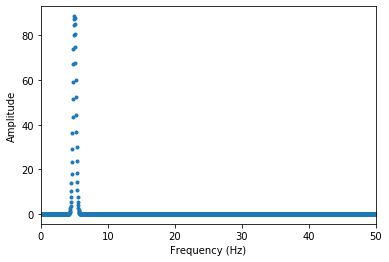

In [11]:
# Calculate the discrete fourier transform of the data and plot the spectrum.
N=len(x)
Y = np.fft.fft(x,N)
f = np.fft.fftfreq(N,dt)

plt.figure()
plt.plot(f,abs(Y),'.')
plt.xlim([0,50])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

# Spectrogram

The spectrogram calculates the spectrum within a 'window'. For instance, if we choose a window length of 5 s, the first window will be the part of the signal from 0-5 s, the second window (assuming no overlap) from 5-10 s, and so on. We can actually allow the windows to overlap in order to produce a smoother representation of the signal. We have alreeady established in lecture that the lowest frequency that can be represented within the spectrum for each 'window' is related to the window length, and the highest frequency is the Nyquist frequency.

In [32]:
from scipy.signal import spectrogram
# start by defining the window length. Choose 2 seconds at first. The window length MUST be an integer:
window_length = int(fs*2.0)
# There is a scipy command to calculate the spectrogram. The keyword arguments are as follows:
# nperseg is the window length
#
# window tells spectrogram to use a 'Windowing function' that mitigates problems
# associated with taking thee DFT of a signal that is not periodic within the window.
# we will not discuss this in detail, but it is a good idea to do this.
#
# noverlap tells spectrogram to use an overlapping window, with the specified overlap in number of samples.
f_spec,t_spec,X_spec=spectrogram(x,fs=fs,window=('hamming'),nperseg=window_length,scaling='spectrum',noverlap=int(window_length/10.))

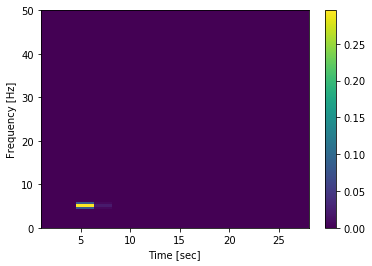

In [33]:
# Plot the spectrogram:
plt.figure()
plt.pcolormesh(t_spec, f_spec, X_spec)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.yscale('log')
#plt.ylim([2e1,2e4])
plt.colorbar()
plt.show()

# Comments

The figure above shows you the there is almost no power in the signal prior to the arrival of the pulse. The pulse arrives, and the power is concentrated near 5 Hz (same as in the spectrum above), and then there is no power after the pulse decays. In many cases (for instance analysis of seismograms) this can provide a more insightful representation of the spectral content of a signal than the spectrum alone.